In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Carrier,Item Quantity,City,Country,Status,Weight,Shipping Date,Delivery Date,Delivery Duration
0,A,2.0,Jeddah,SA,Delivered,0.0625,2021-09-30,2021-10-02,2
1,A,2.0,Madinah,SA,Delivered,0.3450,2021-09-30,2021-10-03,3
2,A,3.0,Makkah,SA,Delivered,2.1000,2021-09-30,2021-10-03,3
3,B,1.0,Riyadh,SA,Delivered,0.7000,2021-09-30,2021-10-03,3
4,B,2.0,Riyadh,SA,Delivered,1.4000,2021-09-30,2021-10-02,2


In [4]:
df.dtypes

Carrier               object
Item Quantity        float64
City                  object
Country               object
Status                object
Weight               float64
Shipping Date         object
Delivery Date         object
Delivery Duration      int64
dtype: object

In [5]:
df.describe()

,Item Quantity,Weight,Delivery Duration
count,167055.000000,167056.000000,167056.000000
mean,3.027219,4.051167,1.504328
std,40.392914,9.518514,1.583442
min,1.000000,0.006000,0.000000
25%,1.000000,1.218000,1.000000
50%,2.000000,2.834000,1.000000
75%,3.000000,4.500000,2.000000
max,7800.000000,1874.400000,80.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167056 entries, 0 to 167055
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Carrier            167056 non-null  object 
 1   Item Quantity      167055 non-null  float64
 2   City               167056 non-null  object 
 3   Country            167056 non-null  object 
 4   Status             167056 non-null  object 
 5   Weight             167056 non-null  float64
 6   Shipping Date      167056 non-null  object 
 7   Delivery Date      167056 non-null  object 
 8   Delivery Duration  167056 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 11.5+ MB


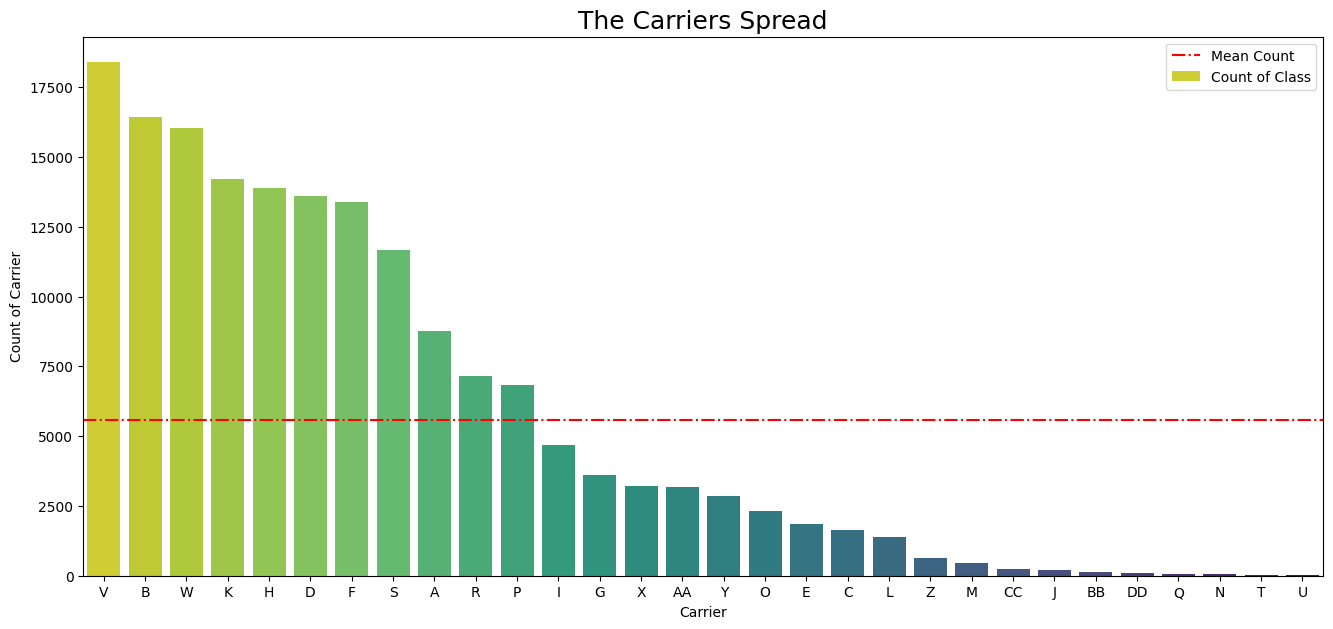

In [30]:
# Get Carriers Spread
plt.figure(figsize=[16,7])
plt.axhline(y=df.Carrier.value_counts().mean(), color='r', linestyle='-.',label='Mean Count')
sns.barplot(x=df.Carrier.value_counts().index,y=df.Carrier.value_counts().values, palette='viridis_r', label='Count of Class')
plt.title('The Carriers Spread', fontsize=18)
plt.ylabel('Count of Carrier')
plt.legend();

In [23]:
# Get Status No. of values
df.Status.nunique()

1

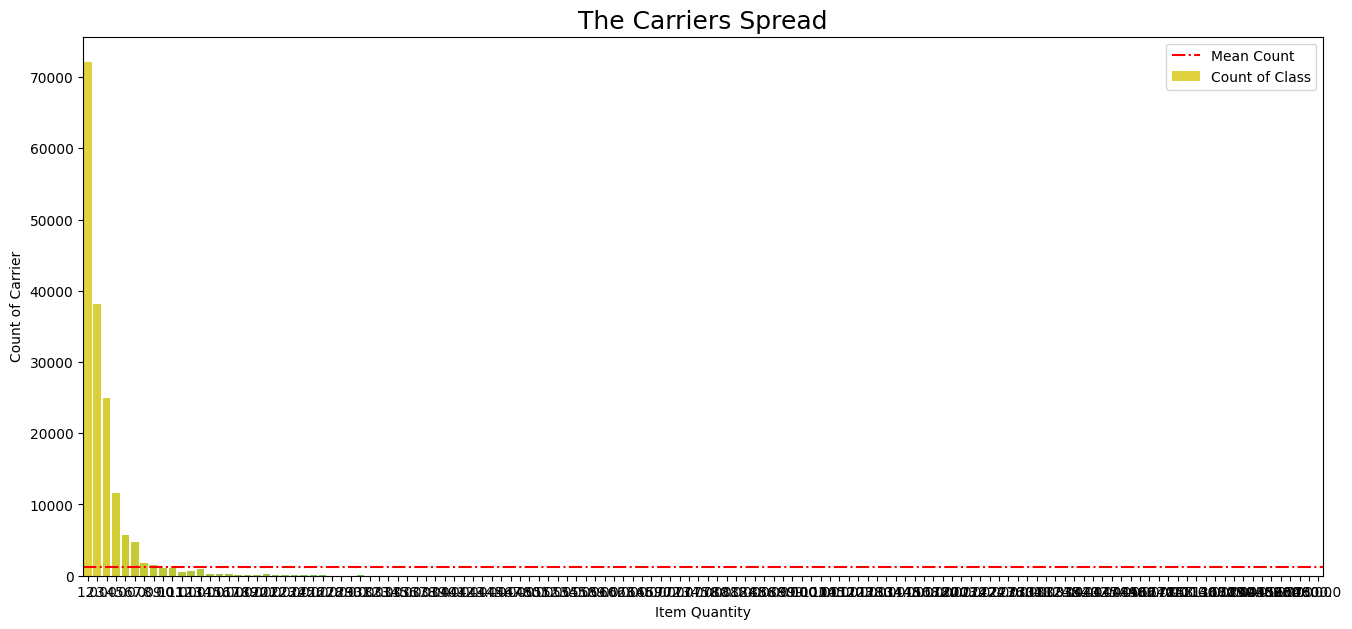

In [41]:
# Get Carriers Spread
plt.figure(figsize=[16,7])
plt.axhline(y=df['Item Quantity'].value_counts().mean(), color='r', linestyle='-.',label='Mean Count')
sns.barplot(x=df['Item Quantity'].value_counts().index,y=df['Item Quantity'].value_counts().values, palette='viridis_r', label='Count of Class')
plt.title('The Carriers Spread', fontsize=18)
plt.ylabel('Count of Carrier')
plt.legend();

In [55]:
# The Impact of Type of Carrier on The Delivery Duration
df[['Carrier','Delivery Duration']].groupby('Carrier').agg(
        mean = ('Delivery Duration', np.mean),
        stdv = ('Delivery Duration', np.std),
        min = ('Delivery Duration', np.min),
        max = ('Delivery Duration', np.max),
        count = ('Delivery Duration', len),
).sort_values('count', ascending=False)

,mean,stdv,min,max,count
Carrier,,,,,
V,0.797172,1.297229,0,80,18385
B,1.852708,1.321191,0,35,16430
W,1.044374,1.232630,0,41,16023
K,2.292777,1.962086,0,39,14219
H,0.461666,0.840150,0,10,13878
D,1.858572,1.334005,0,35,13597
F,1.266353,1.508766,0,50,13392
S,2.138026,1.207795,0,25,11679
A,1.877528,2.078738,0,45,8753


In [56]:
# The Impact of Type of Carrier on The Delivery Weight
df[['Carrier','Weight']].groupby('Carrier').agg(
        mean = ('Weight', np.mean),
        stdv = ('Weight', np.std),
        min = ('Weight', np.min),
        max = ('Weight', np.max),
        count = ('Weight', len),
).sort_values('count', ascending=False)

,mean,stdv,min,max,count
Carrier,,,,,
V,5.047220,7.202357,0.2800,383.590,18385
B,2.598199,3.107518,0.0200,66.705,16430
W,3.723231,8.145767,0.2800,644.815,16023
K,2.997129,5.720050,0.1000,416.510,14219
H,3.812889,6.752964,0.0340,311.290,13878
D,4.095236,4.867452,0.0625,200.000,13597
F,4.349984,7.130358,0.0130,200.000,13392
S,4.344488,2.798473,0.2800,49.000,11679
A,6.658873,22.020849,0.0620,800.460,8753


In [54]:
# The Impact of Type of City on The Delivery Duration
df[['City','Delivery Duration']].groupby('City').agg(
        mean = ('Delivery Duration', np.mean),
        stdv = ('Delivery Duration', np.std),
        min = ('Delivery Duration', np.min),
        max = ('Delivery Duration', np.max),
        count = ('Delivery Duration', len),
).sort_values('count', ascending=False)

,mean,stdv,min,max,count
City,,,,,
Riyadh,0.987822,1.342962,0,80,96402
Jeddah,2.157481,1.614927,0,56,32658
Dammam,2.018803,1.538930,0,29,13721
Makkah,2.399721,1.661794,0,26,12919
Madinah,2.370377,1.611774,0,35,11356


In [52]:
# Make Sure that Delivery Duration = Delivery Date - Shipping Date
df['Shipping Date'] = pd.to_datetime(df['Shipping Date']) 
df['Delivery Date'] = pd.to_datetime(df['Delivery Date']) 
sum((df['Delivery Date'] - df['Shipping Date']).dt.days == df['Delivery Duration']) == len(df)

True